# The UW Machine Learning classification for DR4
Output for the [confluence page](https://confluence.slac.stanford.edu/display/SCIGRPS/The+UW+Machine+Learning+classification) 

<h5 style="text-align:right; margin-right:15px"> 2023-11-05 09:51</h5>

### Scikit-learn parameters

The context is the scikit-learn package

* Targets: We observe that 90% of the associated sources are pulsars (MSP (msp) or young (psr)) or 
blazars, BL Lac (bll) or FSRQ (fsrq). Thus we choose three classes for training:  pulsar=psr+msp+glc,
combined to represent pulsars,  bll, and fsrq. Not that this does not include the blazar bcu class, as 
it is a mixture.
* Features: We assume that the separation needs only variability and spectral information. For the 
spectral information we use the three parameters of the log parabola spectral function: the energy and
energy flux at the peak of the SED, $E_p$  and $F_p$ and the curvature $d$, (We examine spatial
information later to check that "pulsars" are  indeed Galactic.)
* Classification model: We use the SVC model.

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f266396eec0>

### Data selection
We start with the 7195 sources in the 4FGL-DR4 catalog, and discard those
without an R95 value (extended sources) or with a significance < 4, with 6787 remaining. 

### The features for the target names
This plot shows the distributions of the features for each of the three targets. For the variability,
Ep  and Fp we use the log base 10 values log_var, log_fpeak, and log_epeak.

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f26631669b0>
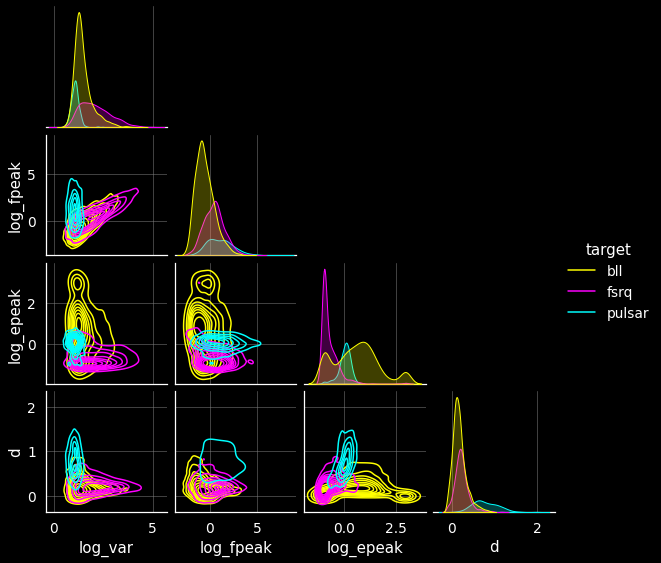

##Fitting
This means training the model with the target classes, then using it to predict the most likely
identity of other sources. We are most interested in the unid sources, but apply it to all.

### Confusion analysis
The following is the output of the "confusion analysis", which trains with a randomly selected 75%
of the targets, then checks the result of predictions for the remaining 25%.

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f2660f5f0d0>

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f266059e800>
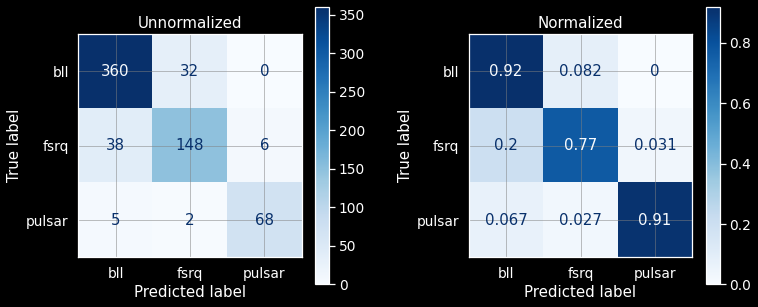

We are only interested in how well the pulsar category is selected, so the mixing between the
two blazar categories is not an issue. So ~10% of real pulsars are lost, with <5% contamination of
FSRQs. This means ~90% efficiency and >95% purity. 

### Prediction statistics
This shows the category assignment for all the association types, including the targets.

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f2660509780>
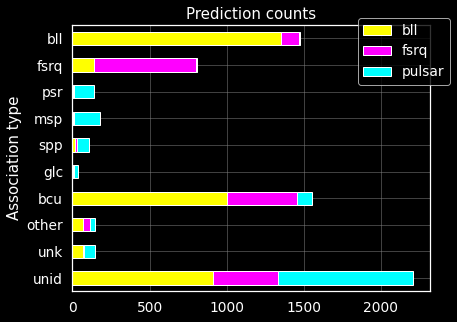

## Unid probabilities
The prediction procedure estimates the three probabilities. Here is the distribution of the pulsar
probability, tagged with the prediction category.

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f26603e9e10>
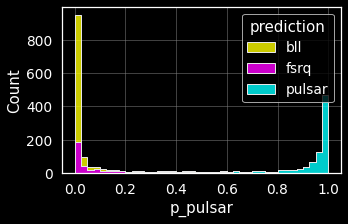

## Unid features
Finally, here are the distributions of the features for the unid class, for each prediction.

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f265ad10e20>
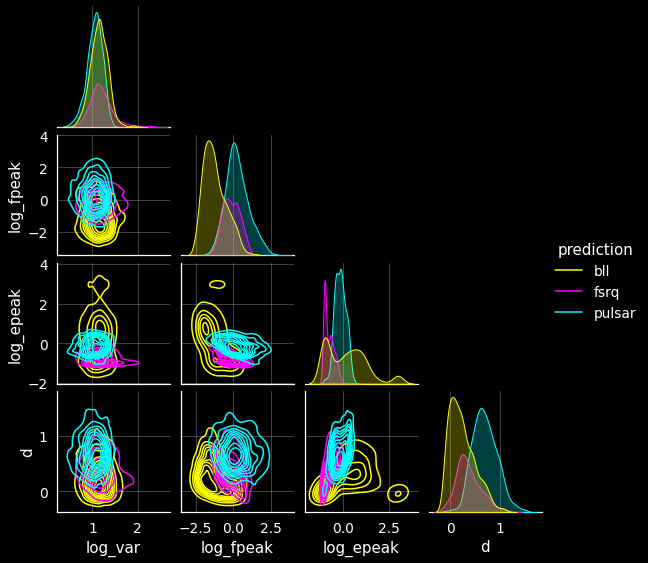

File `files/dr4_pulsar_summary.csv` exists--not overwriting.


In [1]:
%run pylib/ml_fitter doc dr4 dark